# Idealista Market Study

The total number of property listings on Idealista in mainland Portugal, excluding duplicates (i.e., listings with identical area, price, location, and floor), stands at 123,311, with a total value of EUR 64.6 billion.

The pie charts below illustrate the distribution of listing values across the 18 districts of Portugal. The findings align with expectations: Lisbon, with its large population of approximately 2.3 million residents and high price per square meter, unsurprisingly emerges as the largest district by value. In fact, the three largest districts—Lisbon, Faro, and Porto—collectively account for 69% of the total value of property listings. This compares with the combined population of these three districts, which represents 44% of the total population of Portugal.

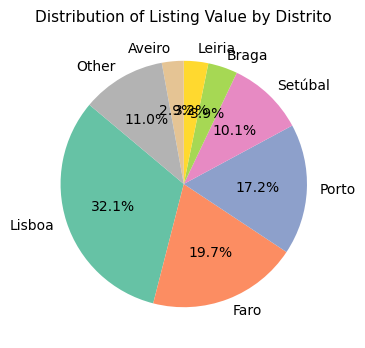

What is particularly interesting, however, is to examine the listing value of each district relative to their respective populations. On this metric, Faro stands out as a clear outlier. While Faro represents only 4.5% of Portugal's population, it accounts for 20% of the total listing value on Idealista. The listing value per capita in Faro is EUR 26,939, with Lisbon ranking second, though significantly lower, at EUR 9,014.

| Distrito | Total Listing Value (EUR) | Average Price per m² (EUR) |
|----------|---------------------------|----------------------------|
| Lisbon   | 20 billion                | 2,607                      |
| Faro     | 4.4 billion               | 1,862                      |
| Porto    | 11.1 billion              | 1,313                      |

Faro's outlier status is largely driven by the high listing value of homes within the municipality of Loulé (Concelho de Loulé), which, despite having a population of only about 67,000 (roughly 0.6% of the country's population), represents almost 7% of the listing value on Idealista. This is only surpassed by Lisbon and Cascais, which account for 12% and 9% of the total value, respectively. The listing value of properties within Loulé totals approximately EUR 4.4 billion, driven by a high price per square meter (EUR 4,415) and a significant number of listings (4,005).

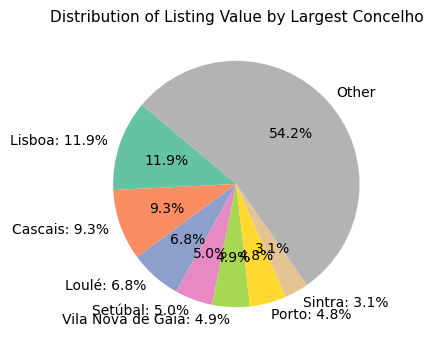

Notably, three specific locations within Loulé—Vilamoura, Quinta do Lago, and Vale do Lobo—account for 70% of the total listing value within the municipality. While Loulé does not have the highest price per square meter within the Faro district (Lagos takes that spot), its sheer number of listings—2.5 times more than Lagos—makes it the most significant municipality within the district.

In regards to Lisbon as a district, it boasts both the highest listing value of any district, with EUR 20 billion in listings, and the highest price per square meter, at EUR 2,607—40% higher than Faro and 99% higher than Porto. The three largest municipalities within Lisbon by listing value are (1) Lisbon itself (EUR 7.7 billion), (2) Cascais (EUR 6 billion), and (3) Sintra (EUR 2 billion). The average price per square meter across these three municipalities ranges from EUR 1,622 in Sintra to EUR 5,952 in Lisbon. Interestingly, while Cascais has less than half the number of listings compared to Lisbon, its listing value is only 28% lower.

Both the municipalities of Loulé and Cascais have a significant portion of their listing value concentrated in houses rather than apartments. In Loulé, approximately 70% of the listing value comes from houses, while in Cascais, this figure is 56%. The disparity is likely explained, among other factors (such as incorrect ad selection), by the higher prevalence of apartment buildings in areas with greater population density.

Porto, on the other hand, stands out as the third-largest district by total listing value, but it is also the most affordable of the top three districts. With a total listing value of EUR 11.1 billion, the average price per square meter in Porto is half of Lisbon's, at EUR 1,313. The largest municipalities in Porto by listing value are Vila Nova de Gaia (EUR 3.2 billion), Porto (EUR 3.1 billion), and Matosinhos (EUR 1 billion), which together account for two-thirds of the district's total listing value. These municipalities exhibit a wide range of prices per square meter, from EUR 3,508 in Porto to just EUR 1,168 in Matosinhos. Furthermore, when comparing the number of homes for sale relative to the population, Porto surpasses Lisbon, with 1.29 homes for sale per 100 people, compared to Lisbon’s 1.12.

Two- and three-bedroom homes make up nearly half of the listings on Idealista. A moderate negative correlation of -0.44 exists between the share of homes with more than three bedrooms and the average price per square meter, suggesting that as the proportion of larger homes increases in a district, the average price per square meter tends to decrease. Surprisingly, despite Porto's significantly lower average price per square meter, the share of homes with more than three bedrooms is 37% in Porto, compared to 48% in Lisbon.

The inverse correlation between the number of rooms and the average price per square meter is particularly noteworthy when comparing the share of one-bedroom homes with the share of homes with more than three rooms, as seen below:

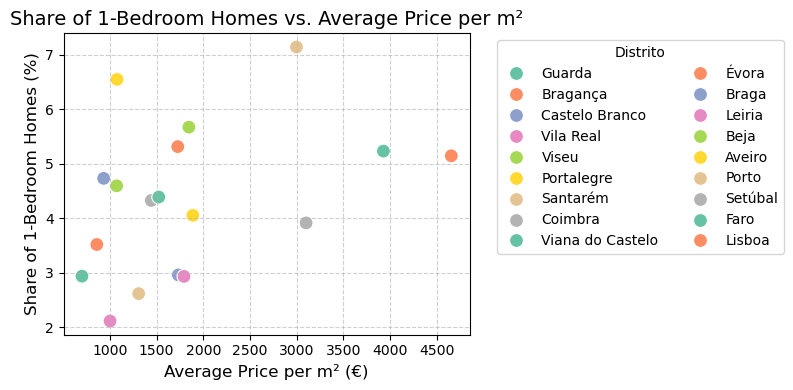
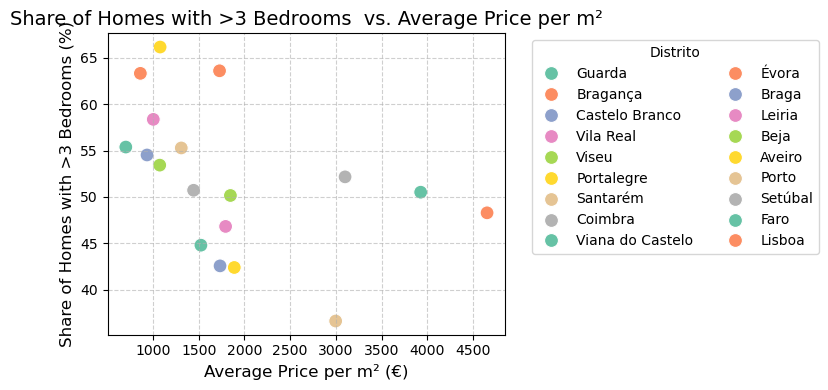

Focusing on one of the most common property types, the two-bedroom home, below are the average prices by district (distrito) for this property type:

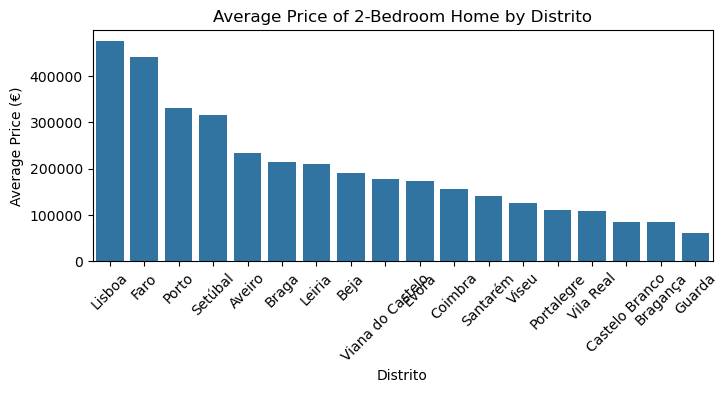

However, within each Distrito, there are significant price variations between Concelhos, as illustrated below for Lisbon, Faro, and Porto.

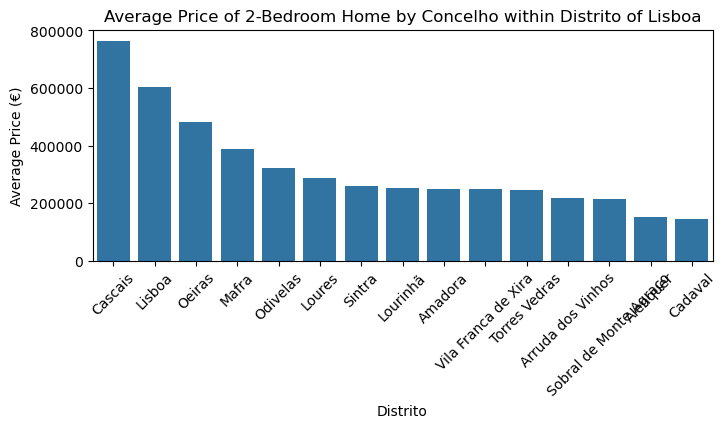
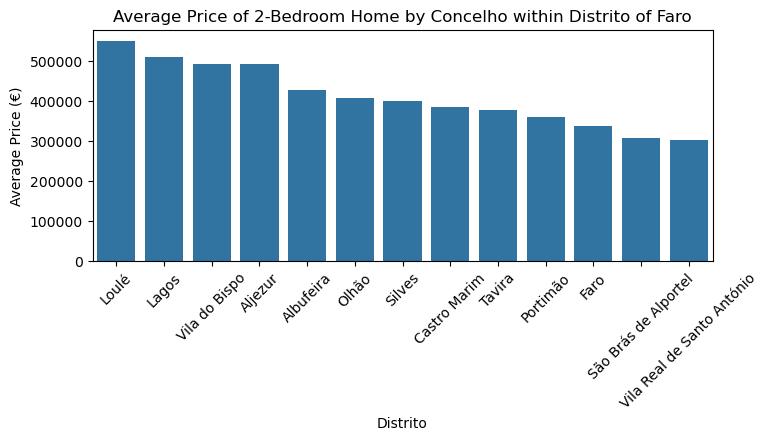
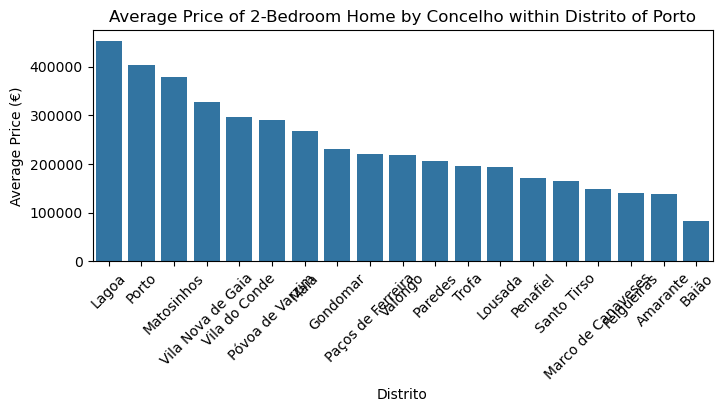

> Dataset Quality

In terms of general data set quality there are two main issues:

(1) There are still some duplicates listings which are not being captured by the duplicates test, overstating the true value of listings for sale. These are listings which have very similar, yet different, characteristics. To the human eye they are obviously duplicates, but Python cannot easily detect them due to the difficulty in creating rules to eliminate these listings.

(2) There is also another issue due to the fact that there is significant activity with respect to new construction, which likely contributes to an understatement of the number of houses/apartments for sale. Often times, the project promoter does not create a listing for every single house/apartment on sale, but instead group listings by tipology or so forth.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import csv
from unidecode import unidecode
import re
import matplotlib.ticker as ticker

### 1. Data Import & Treatment

#### 1.0 Data

In [2]:
df = pd.read_csv(
    "idealista_comp_links.csv",
    sep=";",
    header=0,
    encoding="utf-8",
    quotechar='"',
)

df.head(3)

Title      Price Type  \
0  Apartamento T2 na rua da Liberdade, 19, Carreg...    199.000   T2   
1   Moradia independente, quinta Alenquer, Alenquer,  3.500.000  T14   
2  Moradia independente na rua Principal, 30, Abr...    250.000   T5   

                  Area                  Floor  \
0    117 m² área bruta  3º andar com elevador   
1  1.475 m² área bruta                    NaN   
2    305 m² área bruta                    NaN   

                                                URL  \
0  https://www.idealista.pt/comprar-casas/alenquer/   
1  https://www.idealista.pt/comprar-casas/alenquer/   
2  https://www.idealista.pt/comprar-casas/alenquer/   

                                          Unique Key Tipo Construção  
0  Apartamento T2 na rua da Liberdade, 19, Carreg...               .  
1  Moradia independente, quinta Alenquer, Alenque...               .  
2  Moradia independente na rua Principal, 30, Abr...               .

#### 1.1 Removing "." from Price

In [3]:
df["Price"] = df["Price"].str.replace(".", "", regex=False)
df['Price'] = df['Price'].astype(float)

#### 1.2 Using Regex to Identify Location (as per my definition)

In [4]:
pd.set_option('display.width', 1000)

df['Locations'] = df['URL'].str.extract(r'comprar-casas/(.*?)(?:/pagina.*)?$').apply(lambda x: x.str.split('/'))

location_cols = df['Locations'].apply(pd.Series)
location_cols.columns = [f'Location_{i+1}' for i in range(location_cols.shape[1])]

df = pd.concat([df.drop('Locations', axis=1), location_cols], axis=1)

df.head(3)

Title      Price Type                 Area                  Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4
0  Apartamento T2 na rua da Liberdade, 19, Carreg...   199000.0   T2    117 m² área bruta  3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na rua da Liberdade, 19, Carreg...               .   alenquer                   NaN        NaN
1   Moradia independente, quinta Alenquer, Alenquer,  3500000.0  T14  1.475 m² área bruta                    NaN  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente, quinta Alenquer, Alenque...               .   alenquer                   NaN        NaN
2  Moradia independente na rua Principal, 30, Abr...   250000.0   T5    305 m² área bruta                    NaN  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente na rua Principal, 30, Abr...               .   alenquer                   NaN        NaN

In [5]:
pd.set_option('display.max_rows', None)

df["Location_1"].value_counts()

Location_1
lisboa                                                       11814
lagos                                                         5186
vila-nova-de-gaia                                             4049
sintra                                                        3808
porto                                                         3736
coimbra                                                       3716
viseu                                                         3633
matosinhos                                                    3574
santarem                                                      3441
seixal                                                        3240
quarteira                                                     3154
leiria                                                        3078
castelo-branco                                                3069
viana-do-castelo                                              3039
cascais-e-estoril                                  

In [6]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

df["Concelho"] = df["Location_1"].replace({
    "albufeira": "Albufeira",
    "albufeira-e-olhos-de-agua": "Albufeira",
    "aljezur": "Aljezur",
    "castro-marim": "Castro Marim",
    "faro": "Faro",
    "lagoa-algarve": "Lagoa (Algarve)",
    "lagos": "Lagos",
    "loule": "Loulé",
    "olhao": "Olhão",
    "portimao": "Portimão",
    "quarteira": "Loulé",
    "sao-bras-de-alportel": "São Brás de Alportel",
    "silves": "Silves",
    "tavira": "Tavira",
    "vila-do-bispo": "Vila do Bispo",
    "vila-real-de-santo-antonio": "Vila Real de Santo António",
    "amadora": "Amadora",
    "arruda-dos-vinhos": "Arruda dos Vinhos",
    "cascais": "Cascais",
    "cascais-e-estoril": "Cascais",
    "lisboa": "Lisboa",
    "loures": "Loures",
    "lourinha": "Lourinhã",
    "mafra": "Mafra",
    "odivelas": "Odivelas",
    "sintra": "Sintra",
    "sobral-de-monte-agraco": "Sobral de Monte Agraço",
    "torres-vedras": "Torres Vedras",
    "vila-franca-de-xira": "Vila Franca de Xira",
    "alenquer": "Alenquer",
    "amarante": "Amarante",
    "baiao": "Baião",
    "felgueiras": "Felgueiras",
    "gondomar": "Gondomar",
    "lousada": "Lousada",
    "maia": "Maia",
    "marco-de-canaveses": "Marco de Canaveses",
    "paredes": "Paredes",
    "penafiel": "Penafiel",
    "pacos-de-ferreira": "Paços de Ferreira",
    "povoa-de-varzim": "Póvoa de Varzim",
    "matosinhos": "Porto",
    "vila-do-conde": "Porto",
    "valongo": "Porto",
    "santo-tirso": "Porto",
    "trofa": "Porto",
    "matosinhos": "Matosinhos",
    "vila-do-conde": "Vila do Conde",
    "valongo": "Valongo",
    "santo-tirso": "Santo Tirso",
    "trofa": "Trofa",
    "lagoa-algarve": "Lagoa",
    "lousada": "Lousada",
    "sobral-de-monte-agraco": "Sobral de Monte Agraço",
    "vila-nova-de-gaia": "Vila Nova de Gaia",
    "porto": "Porto",
    "cedofeita-santo-ildefonso-se-miragaia-sao-nicolau-vitoria": "Porto",
    "canidelo": "Vila Nova de Gaia",
    "santa-marinha-e-sao-pedro-da-afurada": "Vila Nova de Gaia",
    "paranhos": "Porto",
    "cadaval": "Cadaval",
    "oeiras": "Oeiras",
    "montijo": "Montijo",
    "sesimbra": "Sesimbra",
    "palmela": "Palmela",
    "barreiro": "Barreiro",
    "grandola": "Grândola",
    "moita": "Moita",
    "alcochete": "Alcochete",
    "santiago-do-cacem": "Santiago do Cacém",
    "alcacer-do-sal": "Alcácer do Sal",
    "setubal": "Setúbal",
    "seixal": "Setúbal",
    "almada": "Setúbal",
    "leiria": "Leiria",
    "braga": "Braga",
    "guimaraes": "Guimarães",
    "caldas-da-rainha": "Caldas da Rainha",
    "vila-nova-de-famalicao": "Vila Nova de Famalicão",
    "alcobaca": "Alcobaça",
    "barcelos": "Barcelos",
    "vila-verde": "Vila Verde",
    "peniche": "Peniche",
    "obidos": "Óbidos",
    "esposende": "Esposende",
    "nazare": "Nazaré",
    "marinha-grande": "Marinha Grande",
    "povoa-de-lanhoso": "Póvoa de Lanhoso",
    "fafe": "Fafe",
    "amares": "Amares",
    "bombarral": "Bombarral",
    "vieira-do-minho": "Vieira do Minho",
    "terras-de-bouro": "Terras de Bouro",
    "vizela": "Vizela",
    "celorico-de-basto": "Celorico de Basto",
    "cabeceiras-de-basto": "Cabeceiras de Basto",
    "aveiro": "Aveiro",
    "santa-maria-da-feira": "Santa Maria da Feira",
    "oliveira-de-azemeis": "Oliveira de Azeméis",
    "ilhavo": "Ílhavo",
    "ovar": "Ovar",
    "espinho": "Espinho",
    "sao-joao-da-madeira": "São João da Madeira",
    "oliveira-do-bairro": "Oliveira do Bairro",
    "vagos": "Vagos",
    "estarreja": "Estarreja",
    "santarem": "Santarém",
    "coimbra": "Coimbra",
    "rio-maior": "Rio Maior",
    "tomar": "Tomar",
    "benavente": "Benavente",
    "entroncamento": "Entroncamento",
    "almeirim": "Almeirim",
    "figueira-da-foz": "Figueira da Foz",
    "alpiarca": "Alpiarça",
    "viana-do-castelo": "Viana do Castelo",
    "ponte-de-lima": "Ponte de Lima",
    "caminha": "Caminha",
    "viseu": "Viseu",
    "castelo-branco": "Castelo Branco",
    "evora": "Évora",
    "portalegre": "Portalegre",
    "beja": "Beja",
    "vila-real": "Vila Real",
    "odemira": "Odemira",
    "chaves": "Chaves",
    "barrancos": "Barrancos",
    "guarda-distrito": "Guarda",
    "braganca-distrito": "Bragança"
    })

# Check for missing Concelho
blank_concelho = df[(df['Concelho'].isnull())]
print(blank_concelho)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho]
Index: []


In [7]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

df["Distrito"] = df["Concelho"].replace({
    "Albufeira": "Faro",
    "Albufeira": "Faro",
    "Aljezur": "Faro",
    "Castro Marim": "Faro",
    "Faro": "Faro",
    "Lagoa": "Faro",
    "Lagos": "Faro",
    "Loulé": "Faro",
    "Olhão": "Faro",
    "Portimão": "Faro",
    "Loulé": "Faro",
    "São Brás de Alportel": "Faro",
    "Silves": "Faro",
    "Tavira": "Faro",
    "Vila do Bispo": "Faro",
    "Vila Real de Santo António": "Faro",
    "Amadora": "Lisboa",
    "Arruda dos Vinhos": "Lisboa",
    "Cascais": "Lisboa",
    "Cascais": "Lisboa",
    "Lisboa": "Lisboa",
    "Loures": "Lisboa",
    "Lourinhã": "Lisboa",
    "Mafra": "Lisboa",
    "Odivelas": "Lisboa",
    "Sintra": "Lisboa",
    "Sobral de Monte Agraço": "Lisboa",
    "Torres Vedras": "Lisboa",
    "Vila Franca de Xira": "Lisboa",
    "Alenquer": "Lisboa",
    "Amarante": "Porto",
    "Baião": "Porto",
    "Felgueiras": "Porto",
    "Gondomar": "Porto",
    "Lousada": "Porto",
    "Maia": "Porto",
    "Marco de Canaveses": "Porto",
    "Paredes": "Porto",
    "Penafiel": "Porto",
    "Paços de Ferreira": "Porto",
    "Póvoa de Varzim": "Porto",
    "Porto": "Porto",
    "Matosinhos": "Porto",
    "Vila do Conde": "Porto",
    "Valongo": "Porto",
    "Santo Tirso": "Porto",
    "Trofa": "Porto",
    "Lousada": "Porto",
    "Sobral de Monte Agraço": "Porto",
    "Vila Nova de Gaia": "Porto",
    "Porto": "Porto",
    "Cadaval": "Lisboa",
    "Oeiras": "Lisboa",
    "Montijo": "Setúbal",
    "Sesimbra": "Setúbal",
    "Palmela": "Setúbal",
    "Barreiro": "Setúbal",
    "Grândola": "Setúbal",
    "Moita": "Setúbal",
    "Alcochete": "Setúbal",
    "Santiago do Cacém": "Setúbal",
    "Alcácer do Sal": "Setúbal",
    "Setúbal": "Setúbal",
    "Leiria": "Leiria",
    "Braga": "Braga",
    "Guimarães": "Braga",
    "Caldas da Rainha": "Leiria",
    "Vila Nova de Famalicão": "Braga",
    "Alcobaça": "Leiria",
    "Barcelos": "Braga",
    "Vila Verde": "Braga",
    "Peniche": "Leiria",
    "Óbidos": "Leiria",
    "Esposende": "Braga",
    "Nazaré": "Leiria",
    "Marinha Grande": "Leiria",
    "Póvoa de Lanhoso": "Braga",
    "Fafe": "Braga",
    "Amares": "Braga",
    "Bombarral": "Leiria",
    "Vieira do Minho": "Braga",
    "Terras de Bouro": "Braga",
    "Vizela": "Braga",
    "Celorico de Basto": "Braga",
    "Cabeceiras de Basto": "Braga",
    "Aveiro": "Aveiro",
    "Santa Maria da Feira": "Aveiro",
    "Oliveira de Azeméis": "Aveiro",
    "Ílhavo": "Aveiro",
    "Ovar": "Aveiro",
    "Espinho": "Aveiro",
    "São João da Madeira": "Aveiro",
    "Oliveira do Bairro": "Aveiro",
    "Vagos": "Aveiro",
    "Estarreja": "Aveiro",
    "Santarém": "Santarém",
    "Coimbra": "Coimbra",
    "Rio Maior": "Santarém",
    "Tomar": "Santarém",
    "Benavente": "Santarém",
    "Entroncamento": "Santarém",
    "Almeirim": "Santarém",
    "Alpiarça": "Santarém",
    "Figueira da Foz": "Coimbra",
    "Viana do Castelo": "Viana do Castelo",
    "Ponte de Lima": "Viana do Castelo",
    "Caminha": "Viana do Castelo",
    "Castelo Branco": "Castelo Branco",
    "Viseu": "Viseu",
    "Seixal": "Setúbal",
    "Évora": "Évora",
    "Portalegre": "Portalegre",
    "Beja": "Beja",
    "Guimarães": "Braga",
    "Figueira da Foz": "Coimbra",
    "Vila Real": "Vila Real",
    "Ílhavo": "Aveiro",
    "Esposende": "Braga",
    "Nazaré": "Leiria",
    "Marinha Grande": "Leiria",
    "Póvoa de Lanhoso": "Braga",
    "Cadaval": "Lisboa",
    "Amares": "Braga",
    "Penafiel": "Porto",
    "Almeirim": "Santarém",
    "Alpiarça": "Santarém",
    "Sobral de Monte Agraço": "Lisboa",
    "Barrancos": "Beja",
    "Lourinhã": "Lisboa",
    "Vagos": "Aveiro",
    "Estarreja": "Aveiro",
    "Rio Maior": "Santarém",
    "Aljezur": "Faro",
    "Portimão": "Faro",
    "Vila do Bispo": "Faro",
    "São Brás de Alportel": "Faro",
    "Trofa": "Porto",
    "Santo Tirso": "Porto",
    "Valongo": "Porto",
    "Paredes": "Porto",
    "Ovarios": "Aveiro",
    "Vieira do Minho": "Braga",
    "Castro Marim": "Faro",
    "Bombarral": "Leiria",
    "Peniche": "Leiria",
    "Ovelha": "Porto",
    "Vila Verde": "Braga",
    "Viseu": "Viseu",
    "Castelo Branco": "Castelo Branco",
    "Évora": "Évora",
    "Portalegre": "Portalegre",
    "Beja": "Beja",
    "Vila Real": "Vila Real",
    "Odemira": "Beja",
    "Chaves": "Vila Real",
    "Barrancos": "Beja",
    "Guarda": "Guarda",
    "Bragança": "Bragança"
    })

# Check for missing Distrito
blank_distrito = df[(df['Distrito'].isnull())]
print(blank_distrito)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito]
Index: []


##### 1.2.1 Adding Concelho

In [8]:
df['Concelho'].value_counts()

Concelho
Lisboa                        11814
Vila Nova de Gaia              8797
Setúbal                        8442
Porto                          8233
Cascais                        5458
Loulé                          5268
Lagos                          5186
Sintra                         3808
Coimbra                        3716
Viseu                          3633
Matosinhos                     3574
Santarém                       3441
Leiria                         3078
Castelo Branco                 3069
Viana do Castelo               3039
Albufeira                      2778
Aveiro                         2732
Braga                          2596
Portimão                       2393
Olhão                          2216
Faro                           2047
Évora                          1895
Oeiras                         1877
Gondomar                       1785
Loures                         1666
Mafra                          1639
Maia                           1613
Portalegre         

In [9]:
df['Distrito'].value_counts()

Distrito
Lisboa              32528
Porto               31557
Faro                24961
Setúbal             16151
Braga                8694
Leiria               7339
Aveiro               6845
Santarém             5257
Coimbra              4975
Viana do Castelo     4065
Viseu                3633
Castelo Branco       3069
Évora                1895
Beja                 1884
Portalegre           1607
Vila Real            1575
Guarda               1266
Bragança             1054
Name: count, dtype: int64

#### 1.3 Using Regex to Identify Type of Listing (as per my definition)

In [10]:
df['Title_Property_Type'] = df['Title'].str.extract(r'(T\d|Moradia independente|Moradia geminada|Moradia|Casa de aldeia|Penthouse|Duplex|Quinta|Casa rústica|Herdade|Castelo|Moinho|Monte|Andar de moradia|Palácio|Solar)')

##### 1.3.1 Adding Simple_Type

In [11]:
df["Property_Type"] = df["Title_Property_Type"].replace({"T0": "apartment",
                                                    "T1": "apartment",
                                                    "T2": "apartment",
                                                    "T3": "apartment",
                                                    "T4": "apartment",
                                                    "T5": "apartment",
                                                    "T6": "apartment",
                                                    "T7": "apartment",
                                                    "T8": "apartment",
                                                    "T9": "apartment",
                                                    "T10": "apartment",
                                                    "T11": "apartment",
                                                    "T12": "apartment",
                                                    "T13": "apartment",
                                                    "T14": "apartment",
                                                    "T15": "apartment",
                                                    "T16": "apartment",
                                                    "T21": "apartment",
                                                    "T32": "apartment",
                                                    "T52": "apartment",
                                                    "Penthouse": "apartment",
                                                    "Duplex": "apartment",
                                                    "Moradia": "house",
                                                    "Moradia independente": "house",
                                                    "Moradia geminada": "house",
                                                    "Casa rústica": "house",
                                                    "Casa de aldeia": "house",
                                                    "Castelo": "house",
                                                    "Herdade": "farm",
                                                    "Quinta": "farm",
                                                    "Andar de moradia": "other",
                                                    "Moinho": "other",
                                                    "Monte": "other"})

# Check for missing Simple_Type_Python
blank_types = df[(df['Property_Type'].isnull())]
print(blank_types)

                                                   Title      Price Type               Area Floor                                                URL                                         Unique Key Tipo Construção Location_1      Location_2 Location_3 Location_4  Concelho Distrito Title_Property_Type Property_Type
11902  na avenida 5 de Outubro, 293, Entrecampos, Ave...  1350000.0   T3  411 m² área bruta   NaN  https://www.idealista.pt/comprar-casas/lisboa/...  na avenida 5 de Outubro, 293, Entrecampos, Ave...               .     lisboa  avenidas-novas        NaN        NaN    Lisboa   Lisboa                 NaN           NaN
11904  na avenida 5 de Outubro, 293, Entrecampos, Ave...  1350000.0   T3  405 m² área bruta   NaN  https://www.idealista.pt/comprar-casas/lisboa/...  na avenida 5 de Outubro, 293, Entrecampos, Ave...               .     lisboa  avenidas-novas        NaN        NaN    Lisboa   Lisboa                 NaN           NaN
93758  Villa na rua Abel Gomes Pólvora, s/n, S

##### 1.3.2 Adding Nº Rooms

In [12]:
df['Number_of_Rooms'] = df['Type'].apply(
    lambda x: int(re.search(r'T(\d+)', str(x)).group(1)) if pd.notnull(x) and re.search(r'T(\d+)', str(x)) else None
)
df.head(1)

# Check for missing NumNumber_of_Roomsber_Rooms
# blank_types = df[(df['Number_of_Rooms'].isnull())]
# print(blank_types)

Title     Price Type               Area                  Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4  Concelho Distrito Title_Property_Type Property_Type  Number_of_Rooms
0  Apartamento T2 na rua da Liberdade, 19, Carreg...  199000.0   T2  117 m² área bruta  3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na rua da Liberdade, 19, Carreg...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T2     apartment                2

#### 1.4 Checking for Blanks in Floor

In [13]:
# Replaces blanks with zero (approximation of what would be correct)
df["Floor"] = df["Floor"].fillna("0").replace("", "0")
df.head(3)

Title      Price Type                 Area                  Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4  Concelho Distrito   Title_Property_Type Property_Type  Number_of_Rooms
0  Apartamento T2 na rua da Liberdade, 19, Carreg...   199000.0   T2    117 m² área bruta  3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na rua da Liberdade, 19, Carreg...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                    T2     apartment                2
1   Moradia independente, quinta Alenquer, Alenquer,  3500000.0  T14  1.475 m² área bruta                      0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente, quinta Alenquer, Alenque...               .   alenquer                   NaN        NaN  Alenquer   Lisboa  Moradia independente         house               14
2  Moradia independente na rua Principal, 30, Abr...   250000.0   T5    305 m² área bruta                      0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente na rua Principal, 30, Abr...               .   alenquer                   NaN        NaN  Alenquer   Lisboa  Moradia independente         house                5

#### 1.5 Using Regex to Extract Listing Area

In [14]:
df['Listing_Area'] = df['Area'].str.extract(r'(\d{1,3}(?:\.\d{3})*)')
df['Listing_Area'] = df['Listing_Area'].str.replace('.', '', regex=False).astype(float)

# Check for missing Area_Python
blank_types = df[(df['Listing_Area'].isnull())]
print(blank_types)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area]
Index: []


#### 1.6 Checking Data Types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Title                158355 non-null  object 
 1   Price                158355 non-null  float64
 2   Type                 158355 non-null  object 
 3   Area                 158355 non-null  object 
 4   Floor                158355 non-null  object 
 5   URL                  158355 non-null  object 
 6   Unique Key           158355 non-null  object 
 7   Tipo Construção      158355 non-null  object 
 8   Location_1           158355 non-null  object 
 9   Location_2           102083 non-null  object 
 10  Location_3           34255 non-null   object 
 11  Location_4           5479 non-null    object 
 12  Concelho             158355 non-null  object 
 13  Distrito             158355 non-null  object 
 14  Title_Property_Type  158349 non-null  object 
 15  Property_Type    

#### 1.7 Dealing with Duplicates

In [16]:
# Identify rows where Area_Python, Price, and Location are the same
duplicates = df[df.duplicated(subset=['Listing_Area', 'Price', 'Location_1', 'Floor'], keep=False)]

# Sort the duplicates by Area_Python, Price, and Location
duplicates_sorted = duplicates.sort_values(by=['Listing_Area', 'Price', 'Location_1', 'Floor'])

# Display the results
if not duplicates_sorted.empty:
    # Perform value counts by "Location"
    location_counts = duplicates_sorted['Location_1'].value_counts()
    print("\nValue counts for duplicates by Location:")
    print(location_counts)
    # Uncomment to show duplicates rows
    #print("Sorted rows with the same Area_Python, Price, and Location:")
    #print(duplicates_sorted)
else:
    print("No duplicates found for Listing_Area, Price, Floor and Location.")



Value counts for duplicates by Location:
Location_1
lagos                                                        5104
lisboa                                                       3525
matosinhos                                                   2216
vila-nova-de-gaia                                            1602
olhao                                                        1533
porto                                                        1513
seixal                                                       1395
sintra                                                       1309
cascais-e-estoril                                            1231
canidelo                                                     1206
quarteira                                                    1203
setubal                                                      1182
santa-marinha-e-sao-pedro-da-afurada                         1007
braga                                                         994
almada                 

In [17]:
df_no_duplicates = df.drop_duplicates(subset=['Listing_Area', 'Price', 'Location_1', 'Floor'], keep='first')

In [18]:
df_no_duplicates.to_csv('output.csv', index=False, encoding='utf-8-sig', sep=',', quoting=1)  # quoting=1 uses minimal quoting

--------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Data Analysis

#### 2.1 Tables for Charts

In [19]:
df_no_duplicates = df_no_duplicates.copy()

##### 2.1.2 Specific Property Type Table

In [20]:
specific_property_type_table = df_no_duplicates.groupby('Title_Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'mean'),
    Number_Listings=('Price', 'count')
    
).reset_index()

specific_property_type_table ['Average_Price_per_m2'] = specific_property_type_table ['Total_Price'] / specific_property_type_table ['Total_Area']

# property_type_table ['Average_Price_per_m2'] = property_type_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Price'] = property_type_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Number_Listings'] = property_type_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Total_Area'] = property_type_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# property_type_table ['Average_Area'] = property_type_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(specific_property_type_table)

     Title_Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0       Andar de moradia  1.528855e+08    242668.0    462.224762              525            630.019117
1         Casa de aldeia  1.548255e+08   2221259.0   1580.967260             1405             69.701672
2           Casa rústica  4.968975e+08   3424473.0   4254.003727              805            145.101902
3                Castelo  6.448500e+06    193132.0  12875.466667               15             33.389081
4                 Duplex  1.719954e+09    501255.0    196.570588             2550           3431.294513
5                Herdade  8.911325e+08   6454644.0   8285.807445              779            138.060675
6                 Moinho  1.076478e+07     15290.0    413.243243               37            704.040353
7                  Monte  1.222181e+08    844490.0   4060.048077              208            144.724141
8                Moradia  8.532809e+09   7827295.0    457.335378

##### 2.1.4 Concelho & Property Type Table

In [21]:
concelho_property_type_table  = df_no_duplicates.groupby(['Concelho', 'Property_Type']).agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

concelho_property_type_table['Average_Price_per_m2'] = concelho_property_type_table['Total_Price'] / concelho_property_type_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(concelho_property_type_table)

                       Concelho Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0                     Albufeira         Solar  6.200000e+05       222.0         222.0                1           2792.792793
1                     Albufeira     apartment  4.742286e+08    129750.0      129750.0             1225           3654.940678
2                     Albufeira          farm  6.274800e+07    305504.0      305504.0               34            205.391746
3                     Albufeira         house  1.131867e+09    405493.0      405493.0              941           2791.334620
4                      Alcobaça     apartment  6.285309e+07     23598.0       23598.0              203           2663.492245
5                      Alcobaça          farm  1.307740e+07     12773.0       12773.0               19           1023.831520
6                      Alcobaça         house  2.077160e+08    328453.0      328453.0              558            632.407081


##### 2.1.5 Property Type & Title Property Type Table

In [22]:
property_type_title_property_type_table  = df_no_duplicates.groupby(['Property_Type', 'Title_Property_Type']).agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

property_type_title_property_type_table['Average_Price_per_m2'] = property_type_title_property_type_table['Total_Price'] / property_type_title_property_type_table['Total_Area']

# concelho_table ['Average_Price_per_m2'] = concelho_table ['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Price'] = concelho_table ['Total_Price'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Number_Listings'] = concelho_table ['Number_Listings'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Total_Area'] = concelho_table ['Total_Area'].apply(lambda x: f"{x:,.0f}")
# concelho_table ['Average_Area'] = concelho_table ['Average_Area'].apply(lambda x: f"{x:,.0f}")

print(property_type_title_property_type_table)

   Property_Type   Title_Property_Type   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0        Palácio               Palácio  3.057525e+08    209416.0      209416.0               95           1460.024544
1          Solar                 Solar  4.888106e+07     85371.0       85371.0               56            572.572162
2      apartment                Duplex  1.719954e+09    501255.0      501255.0             2550           3431.294513
3      apartment             Penthouse  8.087783e+08    177866.0      177866.0              761           4547.121226
4      apartment                    T0  4.357021e+08     98221.0       98221.0             1875           4435.936582
5      apartment                    T1  2.591140e+09    683703.0      683703.0             8880           3789.861482
6      apartment                    T2  8.047826e+09   3380245.0     3380245.0            21450           2380.841024
7      apartment                    T3  9.494103e+09   3

#### 2.2 Number of Listings

In [25]:
number_listings_incl_dups = len(df)
number_listings = len(df_no_duplicates)

print(number_listings_incl_dups)
print(number_listings)

158355
123311


#### 2.3 Value of Listings

In [26]:
total_price = df_no_duplicates["Price"].sum()
formatted_total_price = "{:,.0f}".format(total_price)
print(f"Total Price of Listings on Idealista is EUR {formatted_total_price}")

Total Price of Listings on Idealista is EUR 64,598,926,153


In [27]:
pd.set_option('display.width', 1000)

property_type_table = df_no_duplicates.groupby('Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'mean'),
    Number_Listings=('Price', 'count')
    
).reset_index()

property_type_table ['Average_Price_per_m2'] = property_type_table ['Total_Price'] / property_type_table ['Total_Area']

property_type_table_1 = property_type_table.copy()

total_sum = property_type_table_1['Total_Price'].sum()

property_type_table_1['Per_of_Total'] = property_type_table_1['Total_Price'] / total_sum * 100

property_type_table_1['Total_Price'] = property_type_table_1['Total_Price'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Total_Area'] = property_type_table_1['Total_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Average_Area'] = property_type_table_1['Average_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Number_Listings'] = property_type_table_1['Number_Listings'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Average_Price_per_m2'] = property_type_table_1['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
property_type_table_1['Per_of_Total'] = property_type_table_1['Per_of_Total'].apply(lambda x: f"{x:.2f}%")

print("Property Type by % of Total Value:")
print(property_type_table_1)

Property Type by % of Total Value:
  Property_Type     Total_Price  Total_Area Average_Area Number_Listings Average_Price_per_m2 Per_of_Total
0       Palácio     305,752,500     209,416        2,204              95                1,460        0.47%
1         Solar      48,881,058      85,371        1,524              56                  573        0.08%
2     apartment  27,811,106,808  10,106,112          165          61,081                2,752       43.06%
3          farm   3,843,491,314  20,525,961        4,584           4,478                  187        5.95%
4         house  32,296,356,127  34,220,528          602          56,825                  944       50.00%
5         other     285,868,346   1,102,448        1,432             770                  259        0.44%


In [28]:
pd.set_option('display.width', 1000)

property_type_table_2 = property_type_table.copy()

total_sum_listings = property_type_table['Number_Listings'].sum()

property_type_table_2['Per_of_Total'] = property_type_table_2['Number_Listings'] / total_sum_listings * 100

property_type_table_2['Total_Price'] = property_type_table_2['Total_Price'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Total_Area'] = property_type_table_2['Total_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Average_Area'] = property_type_table_2['Average_Area'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Number_Listings'] = property_type_table_2['Number_Listings'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Average_Price_per_m2'] = property_type_table_2['Average_Price_per_m2'].apply(lambda x: f"{x:,.0f}")
property_type_table_2['Per_of_Total'] = property_type_table_2['Per_of_Total'].apply(lambda x: f"{x:.2f}%")

print("Property Type by % of Total Listings:")
print(property_type_table_2)

Property Type by % of Total Listings:
  Property_Type     Total_Price  Total_Area Average_Area Number_Listings Average_Price_per_m2 Per_of_Total
0       Palácio     305,752,500     209,416        2,204              95                1,460        0.08%
1         Solar      48,881,058      85,371        1,524              56                  573        0.05%
2     apartment  27,811,106,808  10,106,112          165          61,081                2,752       49.54%
3          farm   3,843,491,314  20,525,961        4,584           4,478                  187        3.63%
4         house  32,296,356,127  34,220,528          602          56,825                  944       46.08%
5         other     285,868,346   1,102,448        1,432             770                  259        0.62%


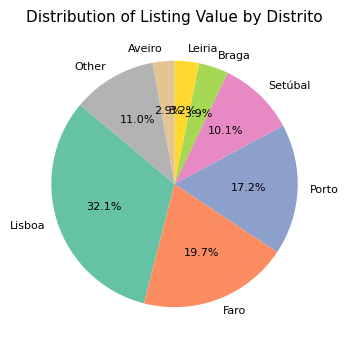

In [147]:
distrito_table  = df_no_duplicates.groupby('Distrito').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

distrito_table['Average_Price_per_m2'] = distrito_table['Total_Price'] / distrito_table['Total_Area']

sorted_distritos = distrito_table.sort_values(by='Total_Price', ascending=False)
top_7_distritos = sorted_distritos.head(7)
other_distritos_total = sorted_distritos.iloc[7:]['Total_Price'].sum()
other_distritos_category = pd.DataFrame({'Distrito': ['Other'], 'Total_Price': [other_distritos_total]})

# Concatenate the top 7 districts with the "Other" category
final_data_distrito = pd.concat([top_7_distritos, other_distritos_category], ignore_index=True)

plt.figure(figsize=(10, 4))
plt.pie(
    final_data_distrito['Total_Price'],
    labels=final_data_distrito['Distrito'],
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'black', 'fontsize': 8} 
)

plt.title('Distribution of Listing Value by Distrito', color='black', fontsize=11)
plt.show()

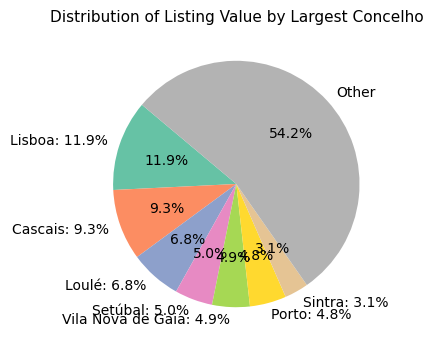

In [30]:
concelho_table  = df_no_duplicates.groupby('Concelho').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

concelho_table['Average_Price_per_m2'] = concelho_table['Total_Price'] / concelho_table['Total_Area']

sorted_concelhos = concelho_table.sort_values(by='Total_Price', ascending=False)
top_7_concelhos = sorted_concelhos.head(7)
# Calculate the sum of Total_Price for the remaining Concelhos
other_concelhos_total = sorted_concelhos.iloc[7:]['Total_Price'].sum()

# Create a new DataFrame for the "Other" category
other_category = pd.DataFrame({'Concelho': ['Other'], 'Total_Price': [other_concelhos_total]})

# Concatenate the top 7 Concelhos with the "Other" category
final_data = pd.concat([top_7_concelhos, other_category], ignore_index=True)

plt.figure(figsize=(10, 4))

# Define labels and ensure only top 7 have names
labels = [f"{name}: {percent:.1f}%" if name != 'Other' else 'Other' for name, percent in zip(final_data['Concelho'], 100 * final_data['Total_Price'] / final_data['Total_Price'].sum())]

plt.pie(
    final_data['Total_Price'],
    labels=labels,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'black'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listing Value by Largest Concelho', color='black', fontsize=11)
plt.show()

In [31]:
df_distrito_population = pd.read_csv(
    "Distrito_Population.csv",
    sep=";",
    header=0,
    encoding="utf-8",
    quotechar='"',
)

df_distrito_population.head(20)

distrito_table

df_distrito_population_per_capita = pd.merge(df_distrito_population, distrito_table, on='Distrito')

df_distrito_population_per_capita["Listing_Value_per_Capita"] = df_distrito_population_per_capita["Total_Price"] / df_distrito_population_per_capita["Population"]
df_distrito_population_per_capita["Listings_per_100_People"] = (df_distrito_population_per_capita["Number_Listings"] / df_distrito_population_per_capita["Population"]) * 100


df_distrito_population_per_capita_sorted = df_distrito_population_per_capita.sort_values(by='Listing_Value_per_Capita', ascending=False)

df_distrito_population_per_capita_sorted["Population"] = df_distrito_population_per_capita_sorted["Population"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Total_Price"] = df_distrito_population_per_capita_sorted["Total_Price"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Number_Listings"] = df_distrito_population_per_capita_sorted["Number_Listings"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Average_Price_per_m2"] = df_distrito_population_per_capita_sorted["Average_Price_per_m2"].apply(lambda x: f"{x:,.0f}")
df_distrito_population_per_capita_sorted["Listing_Value_per_Capita"] = df_distrito_population_per_capita_sorted["Listing_Value_per_Capita"].apply(lambda x: f"{x:,.0f}")

df_distrito_population_per_capita_sorted = df_distrito_population_per_capita_sorted.drop(columns=['Total_Area', 'Average_Area'])

print(df_distrito_population_per_capita_sorted)

            Distrito Population     Total_Price Number_Listings Average_Price_per_m2 Listing_Value_per_Capita  Listings_per_100_People
5               Faro    472,000  12,715,101,379          16,673                1,857                   26,939                 3.532415
0             Lisboa  2,301,904  20,748,788,267          25,901                2,607                    9,014                 1.125199
2            Setúbal    887,928   6,493,886,467          12,189                1,292                    7,314                 1.372746
1              Porto  1,819,515  11,094,430,116          23,643                1,313                    6,097                 1.299412
14              Beja    146,725     683,557,489           1,703                   91                    4,659                 1.160675
10  Viana do Castelo    232,220   1,061,866,558           3,418                  865                    4,573                 1.471880
13             Évora    152,853     696,360,941        

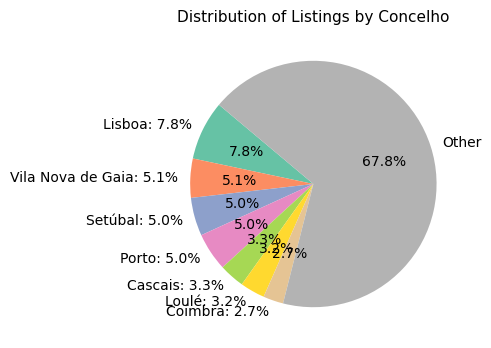

In [32]:
sorted_concelhos = concelho_table.sort_values(by='Number_Listings', ascending=False)

top_7_concelhos = sorted_concelhos.head(7)

# Calculate the sum of Total_Price for the remaining Concelhos
other_concelhos_total = sorted_concelhos.iloc[7:]['Number_Listings'].sum()

# Create a new DataFrame for the "Other" category
other_category = pd.DataFrame({'Concelho': ['Other'], 'Number_Listings': [other_concelhos_total]})

# Concatenate the top 7 Concelhos with the "Other" category
final_data = pd.concat([top_7_concelhos, other_category], ignore_index=True)

plt.figure(figsize=(10, 4))

# Define labels and ensure only top 7 have names
labels = [f"{name}: {percent:.1f}%" if name != 'Other' else 'Other' for name, percent in zip(final_data['Concelho'], 100 * final_data['Number_Listings'] / final_data['Number_Listings'].sum())]

plt.pie(
    final_data['Number_Listings'],
    labels=labels,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors,
    startangle=140,
    textprops={'color': 'black'}  # Set text color to white for better contrast
)

plt.title('Distribution of Listings by Concelho', color='black', fontsize=11)
plt.show()

#### 2.4 Largest Property Type by Value and Nº of Listings

In [33]:
pd.set_option('display.width', 1000)

# Calculating Average Price per m2
concelho_table['Average_Price_per_m2'] = concelho_table['Total_Price'] / concelho_table['Total_Area']

print(concelho_table)

                       Concelho   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0                     Albufeira  1.669463e+09    840969.0      840969.0             2201           1985.166162
1                      Alcobaça  2.838855e+08    365070.0      365070.0              782            777.619341
2                     Alcochete  1.948733e+08     73965.0       73965.0              324           2634.669506
3                Alcácer do Sal  2.279886e+08    554485.0      554485.0              267            411.171718
4                      Alenquer  1.443459e+08    191669.0      191669.0              432            753.100058
5                       Aljezur  2.115498e+08    780353.0      780353.0              223            271.095054
6                      Almeirim  5.911780e+07    112942.0      112942.0              222            523.435055
7                      Alpiarça  1.272788e+07     33214.0       33214.0               53            383.208286
8

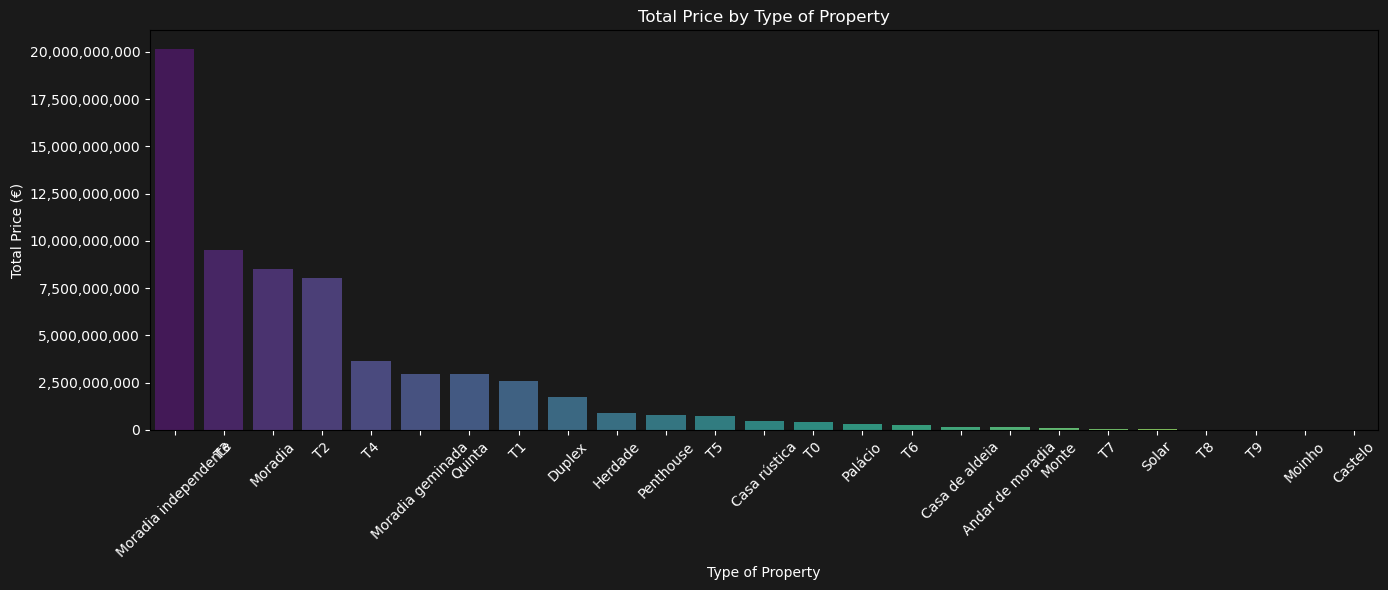

In [34]:
property_type_table_sorted_price = specific_property_type_table.copy()
property_type_table_sorted_price = property_type_table_sorted_price.sort_values(by='Total_Price', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))

# Set the background color to dark grey
fig.patch.set_facecolor('#1A1A1A')
ax.set_facecolor('#1A1A1A')

sns.barplot(x='Title_Property_Type', hue='Title_Property_Type', y='Total_Price', data=property_type_table_sorted_price, palette='viridis', ax=ax, legend=False)
ax.set_title('Total Price by Type of Property', color='white')
ax.set_xlabel('Type of Property', color='white')
ax.set_ylabel('Total Price (€)', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

# Format the y-axis with thousand separators
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

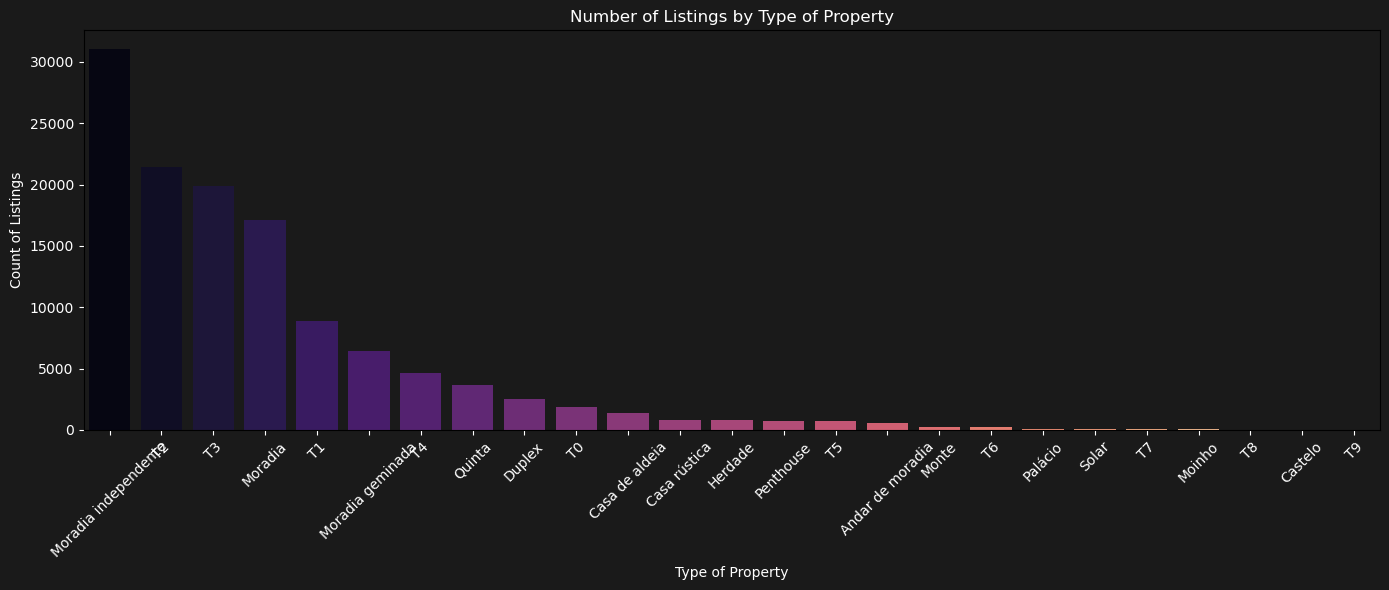

In [35]:
property_type_table_sorted_listings = specific_property_type_table.copy()
property_type_table_sorted_listings = property_type_table_sorted_listings.sort_values(by='Number_Listings', ascending=False)

# Plotting the count of listings for each type with a dark grey background
fig, ax = plt.subplots(figsize=(14, 6))

# Set the background color to dark grey
fig.patch.set_facecolor('#1A1A1A')
ax.set_facecolor('#1A1A1A')

# Plotting
sns.barplot(x='Title_Property_Type', hue='Title_Property_Type', y='Number_Listings', data=property_type_table_sorted_listings, palette='magma', ax=ax, legend=False)
ax.set_title('Number of Listings by Type of Property', color='white')
ax.set_xlabel('Type of Property', color='white')
ax.set_ylabel('Count of Listings', color='white')
ax.tick_params(axis='x', colors='white', rotation=45)
ax.tick_params(axis='y', colors='white')

plt.tight_layout()
plt.show()

#### 2.5 Info by Location

In [36]:
from matplotlib.animation import FuncAnimation

# Ensure interactive mode in Jupyter Notebook
%matplotlib notebook

# Get unique Concelhos
concelhos = df_no_duplicates["Concelho"].unique()

df_no_duplicates["Average_Price_per_m2"] = df_no_duplicates["Price"] / df_no_duplicates["Listing_Area"]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    """Update function for animation."""
    ax.clear()  # Clear the previous plot
    
    # Get the current Concelho
    var1 = concelhos[frame]
    
    # Filter the data
    df_distrito_distribution = df_no_duplicates[df_no_duplicates["Concelho"] == var1]
    
    # Check if there's data for the current Concelho
    if df_distrito_distribution.empty:
        ax.text(0.5, 0.5, f"No data for {var1}", fontsize=12, ha='center')
    else:
        # Plot the histogram
        sns.histplot(data=df_distrito_distribution['Average_Price_per_m2'], bins=25, kde=True, ax=ax)
    
    # Set grid, labels, and title
    ax.yaxis.grid(True)
    ax.set_xlabel("Average Price per m² (€)", fontsize=12)
    ax.set_title(f"Distribution of Average Price per m² in {var1}", fontsize=12)

# Create the animation and use the JSHTML renderer for Jupyter Notebook
ani = FuncAnimation(fig, update, frames=len(concelhos), interval=1500, repeat=False)

# Use the JSHTML renderer to display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

In [37]:
distrito_var = "Porto"
concelho_filter_table = df_no_duplicates[df_no_duplicates['Distrito'] == distrito_var]

concelho_filter_table_  = concelho_filter_table.groupby('Concelho').agg(
    Total_Price=('Price', 'sum'),
    Total_Area=('Listing_Area', 'sum'),
    Average_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

concelho_filter_table_['Average_Price_per_m2'] = concelho_filter_table_['Total_Price'] / concelho_filter_table_['Total_Area']

print(concelho_filter_table_)

              Concelho   Total_Price  Total_Area  Average_Area  Number_Listings  Average_Price_per_m2
0             Amarante  1.016711e+08    275472.0      275472.0              324            369.079685
1                Baião  5.692129e+07    169364.0      169364.0              250            336.088484
2           Felgueiras  9.976504e+07    147901.0      147901.0              287            674.539320
3             Gondomar  4.664501e+08    587926.0      587926.0             1319            793.382303
4                Lagoa  9.013689e+08    461625.0      461625.0             1011           1952.599762
5              Lousada  7.649442e+07    194715.0      194715.0              237            392.853252
6                 Maia  5.080762e+08    418622.0      418622.0             1280           1213.687298
7   Marco de Canaveses  1.071809e+08   1359409.0     1359409.0              388             78.843728
8           Matosinhos  1.034059e+09    857285.0      857285.0             2203   

In [38]:
filter_string = ['Vilamoura', 'Quinta do Lago', 'Vale do Lobo']  # Add any strings you want to check
filtered_df = df[df['Title'].str.contains('|'.join(filter_string), na=False)]
filtered_df_price = filtered_df['Price'].sum()

# Print the filtered DataFrame
print(filtered_df_price)

3148318664.0


#### 2.6 Info by Type & Location

##### 2.6.1 Apartments Analysis

In [98]:
property_variable = "apartment"
apartment_property_type_table = df_no_duplicates[df_no_duplicates['Property_Type'] == property_variable]

apartment_property_type_table.head(4)

Title     Price Type               Area                     Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4  Concelho Distrito Title_Property_Type Property_Type  Number_of_Rooms  Listing_Area  Average_Price_per_m2  Floor_Number Elevator_Status  Price_per_m2
0  Apartamento T2 na rua da Liberdade, 19, Carreg...  199000.0   T2  117 m² área bruta     3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na rua da Liberdade, 19, Carreg...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T2     apartment                2         117.0           1700.854701             0    com elevador   1700.854701
5  Apartamento T2 na praceta Pedro Álvares Cabral...  170000.0   T2  125 m² área bruta     3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na praceta Pedro Álvares Cabral...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T2     apartment                2         125.0           1360.000000             0    com elevador   1360.000000
6  Apartamento T3 na rua Nuno Tristão, Carregado ...  195000.0   T3  158 m² área bruta  Rés do chão sem elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T3 na rua Nuno Tristão, Carregado ...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T3     apartment                3         158.0           1234.177215             0    sem elevador   1234.177215
7  Apartamento T2 em Carregado e Cadafais, Alenquer,  165000.0   T2   87 m² área bruta     5º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 em Carregado e Cadafais, Alenqu...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T2     apartment                2          87.0           1896.551724             0    com elevador   1896.551724

In [39]:
apartment_property_type_table_1 = apartment_property_type_table.groupby('Distrito').agg(
    Total_Price=('Price', 'sum'),
    Number_Listings=('Price', 'count'),
    Total_Area=('Listing_Area', 'sum')
)

apartment_property_type_table_1["Average_Price_per_m2"] = apartment_property_type_table_1["Total_Price"] / apartment_property_type_table_1["Total_Area"]

apartment_property_type_table_1 = apartment_property_type_table_1.sort_values(by="Total_Price", ascending=False)

print(apartment_property_type_table_1)

                   Total_Price  Number_Listings  Total_Area  Average_Price_per_m2
Distrito                                                                         
Lisboa            1.215578e+10            18182   2612065.0           4653.704554
Porto             6.665769e+09            16088   2480803.0           2686.939929
Faro              3.738955e+09             8358   1230068.0           3039.632371
Setúbal           2.067646e+09             6164   1369005.0           1510.327875
Braga             6.943742e+08             2521    423585.0           1639.279554
Aveiro            6.863136e+08             2300    335836.0           2043.597402
Leiria            5.571572e+08             1958    261868.0           2127.626277
Coimbra           4.022536e+08             1456    181260.0           2219.208038
Viana do Castelo  2.327963e+08              863    108447.0           2146.636910
Santarém          2.031124e+08             1023    241926.0            839.564288
Viseu           

In [40]:
apartment_variable = "T2"
apartment_property_type_variable_table = apartment_property_type_table[apartment_property_type_table['Title_Property_Type'] == apartment_variable]

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

# Group by both Location and Type_Python
apartment_property_type_variable_table = apartment_property_type_variable_table.groupby(['Concelho']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
apartment_property_type_variable_table['Average_Price_per_m2'] = apartment_property_type_variable_table['Average_Price'].astype(float) / apartment_property_type_variable_table['Average_Area'].astype(float)

apartment_property_type_variable_table = apartment_property_type_variable_table.sort_values(by='Average_Price_per_m2', ascending=False)

total_sum_listing_type = apartment_property_type_variable_table['Number_Listings'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(20, 12))

# Create a bar plot
plt.bar(apartment_property_type_variable_table['Concelho'], apartment_property_type_variable_table['Average_Price_per_m2'], color='#4682B4')

# Set background color to dark grey
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background color
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background color

# Set titles and labels with white text for better contrast
plt.title(f'Average Price per m² {apartment_variable} by Location', fontsize=12, color='white')
plt.xlabel('Location', fontsize=10, color='white')
plt.ylabel('Average Price per m² (€)', fontsize=10, color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.yticks(color='white')  # Set y ticks color to white
plt.grid(axis='y', color='grey')  # Add gridlines in grey for better visibility

plt.tight_layout()
plt.show()

print(f"The average price for {apartment_variable} per square meter for apartments on Idealista is EUR {total_sum_listing_type}")
print(f"Summary of Listing Data by Location and Type {apartment_variable}:")
print(apartment_property_type_variable_table)

<IPython.core.display.Javascript object>

The average price for T2 per square meter for apartments on Idealista is EUR 21450
Summary of Listing Data by Location and Type T2:
                       Concelho   Total_Price  Average_Price  Average_Area  Total_Area  Number_Listings  Average_Price_per_m2
45                       Lisboa  1.763503e+09  594773.402024     95.745363    283885.0             2965           6212.033524
26                 Castro Marim  1.129900e+07  564950.000000    104.200000      2084.0               20           5421.785029
39                     Grândola  4.099350e+07  594108.695652    127.043478      8766.0               69           4676.420260
60                       Oeiras  1.780463e+08  474790.146667    106.472000     39927.0              375           4459.295840
42                        Lagoa  7.305839e+07  440110.783133    106.481928     17676.0              166           4133.196990
43                        Lagos  2.388863e+08  495614.740664    121.163900     58401.0              482         

In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

apartment_property_type_table_title_type = apartment_property_type_table.groupby('Title_Property_Type').agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
apartment_property_type_table_title_type['Average_Price_per_m2'] = apartment_property_type_table_title_type['Average_Price'] / apartment_property_type_table_title_type['Average_Area']

apartment_property_type_table_title_type = apartment_property_type_table_title_type.sort_values(by='Average_Price_per_m2', ascending=False)

print(apartment_property_type_table_title_type)

   Title_Property_Type   Total_Price  Average_Price  Average_Area  Total_Area  Number_Listings  Average_Price_per_m2
1            Penthouse  8.087783e+08   1.062784e+06    233.726675    177866.0              761           4547.121226
2                   T0  4.357021e+08   2.323745e+05     52.384533     98221.0             1875           4435.936582
8                   T6  2.443637e+08   1.197861e+06    283.627451     57860.0              204           4223.361908
3                   T1  2.591140e+09   2.917950e+05     76.993581    683703.0             8880           3789.861482
9                   T7  5.406100e+07   1.126271e+06    302.770833     14533.0               48           3719.878896
6                   T4  3.651511e+09   7.814062e+05    212.220843    991708.0             4673           3682.042541
0               Duplex  1.719954e+09   6.744916e+05    196.570588    501255.0             2550           3431.294513
11                  T9  1.332691e+07   9.519224e+05    301.57142

##### 2.6.2 Houses Analysis

In [99]:
property_variable = "house"
house_property_type_table = df_no_duplicates[df_no_duplicates['Property_Type'] == property_variable]

house_property_type_table.head(4)

Title      Price Type                 Area Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4  Concelho Distrito   Title_Property_Type Property_Type  Number_of_Rooms  Listing_Area  Average_Price_per_m2  Floor_Number Elevator_Status  Price_per_m2
1   Moradia independente, quinta Alenquer, Alenquer,  3500000.0  T14  1.475 m² área bruta     0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente, quinta Alenquer, Alenque...               .   alenquer                   NaN        NaN  Alenquer   Lisboa  Moradia independente         house               14        1475.0           2372.881356             0    sem elevador   2372.881356
2  Moradia independente na rua Principal, 30, Abr...   250000.0   T5    305 m² área bruta     0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente na rua Principal, 30, Abr...               .   alenquer                   NaN        NaN  Alenquer   Lisboa  Moradia independente         house                5         305.0            819.672131             0    sem elevador    819.672131
3  Moradia em Aldeia Galega da Merceana e Aldeia ...   180000.0   T2    210 m² área bruta     0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia em Aldeia Galega da Merceana e Aldeia ...               .   alenquer                   NaN        NaN  Alenquer   Lisboa               Moradia         house                2         210.0            857.142857             0    sem elevador    857.142857
4                  Moradia independente em Alenquer,  1100000.0   T5    622 m² área bruta     0  https://www.idealista.pt/comprar-casas/alenquer/  Moradia independente em Alenquer,1.100.000T562...               .   alenquer                   NaN        NaN  Alenquer   Lisboa  Moradia independente         house                5         622.0           1768.488746             0    sem elevador   1768.488746

In [42]:
house_property_type_table_1 = house_property_type_table.groupby('Distrito').agg(
    Total_Price=('Price', 'sum'),
    Number_Listings=('Price', 'count'),
    Total_Area=('Listing_Area', 'sum')
)

house_property_type_table_1["Average_Price_per_m2"] = house_property_type_table_1["Total_Price"] / house_property_type_table_1["Total_Area"]

house_property_type_table_1 = house_property_type_table_1.sort_values(by="Total_Price", ascending=False)

print(house_property_type_table_1)

                   Total_Price  Number_Listings  Total_Area  Average_Price_per_m2
Distrito                                                                         
Faro              8.383267e+09             7797   3697611.0           2267.211695
Lisboa            7.857400e+09             7381   4319658.0           1818.986619
Porto             3.994086e+09             6949   3671544.0           1087.849248
Setúbal           3.854033e+09             5522   2056048.0           1874.486133
Braga             1.571017e+09             4017   1819529.0            863.419592
Leiria            1.422226e+09             3980   1690721.0            841.194932
Aveiro            1.028855e+09             2946   1789806.0            574.841503
Santarém          8.693961e+08             3242   3930505.0            221.191961
Viana do Castelo  7.001456e+08             2331    832789.0            840.723850
Coimbra           6.040374e+08             2731   1835536.0            329.079564
Viseu           

In [43]:
house_variable = "Moradia geminada"
house_property_type_table_2 = house_property_type_table[house_property_type_table['Title_Property_Type'] == house_variable]

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set width to avoid wrapping

# Group by both Location and Type_Python
house_property_type_table_2 = house_property_type_table_2.groupby(['Concelho']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
).reset_index()

# Calculate Average_Price_per_m2
house_property_type_table_2['Average_Price_per_m2'] = house_property_type_table_2['Average_Price'].astype(float) / house_property_type_table_2['Average_Area'].astype(float)

house_property_type_table_2 = house_property_type_table_2.sort_values(by='Average_Price_per_m2', ascending=False)

total_sum_listing_type_house = house_property_type_table_2['Number_Listings'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(20, 12))

# Create a bar plot
plt.bar(house_property_type_table_2['Concelho'], house_property_type_table_2['Average_Price_per_m2'], color='#4682B4')

# Set background color to dark grey
plt.gcf().set_facecolor('#1A1A1A')  # Set the figure background color
plt.gca().set_facecolor('#1A1A1A')  # Set the axes background color

# Set titles and labels with white text for better contrast
plt.title(f'Average Price per m² {house_variable} on Idealista', fontsize=12, color='white')
plt.xlabel('Location', fontsize=10, color='white')
plt.ylabel('Average Price per m² (€)', fontsize=10, color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.yticks(color='white')  # Set y ticks color to white
plt.grid(axis='y', color='grey')  # Add gridlines in grey for better visibility

plt.tight_layout()
plt.show()

print(f"The average price for {house_variable} per square meter on Idealista is EUR {total_sum_listing_type_house}")
print(f"Summary of Listing Data by Location and Type {house_variable}:")
print(house_property_type_table_2)

<IPython.core.display.Javascript object>

The average price for Moradia geminada per square meter on Idealista is EUR 6469
Summary of Listing Data by Location and Type Moradia geminada:
                       Concelho  Total_Price  Average_Price  Average_Area  Total_Area  Number_Listings  Average_Price_per_m2
45                       Lisboa  120265500.0   1.113569e+06    218.240741     23570.0              108           5102.481969
25                      Cascais  350225199.0   1.224564e+06    254.835664     72883.0              286           4805.307122
43                        Lagos   52876950.0   8.134915e+05    181.738462     11813.0               65           4476.166088
60                       Oeiras   58113200.0   9.685533e+05    248.050000     14883.0               60           3904.669757
39                     Grândola   28067000.0   8.019143e+05    209.228571      7323.0               35           3832.718831
5                       Aljezur    6161944.0   5.601767e+05    156.090909      1717.0               11    

#### 2.7 Info by Floor & Room

In [44]:
def extract_number(text):
    # Check for the specific 'Cave' related terms
    if any(term in text.lower() for term in ['cave', 'cave sem elevador', 'cave com elevador']):
        return -1
    # Check for other terms that should return 0 (e.g., "Rés do chão", "Entreplanta", etc.)
    elif any(term in text.lower() for term in ['rés do chão', 'entreplanta', 'sem elevador', 'com elevador']):
        return 0
    # Extract the number if no specific term is found
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None

df_no_duplicates['Floor_Number'] = df_no_duplicates['Floor'].apply(extract_number)

# Check for empty Floor_Number
empty_floors = df_no_duplicates[df_no_duplicates['Floor_Number'].isna()]
print(empty_floors)

# floor_pivot_check = df_no_duplicates.groupby('Floor_Number').agg(
#     Total_Price=('Price', 'sum')
# ).reset_index()

# print(floor_pivot_check)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Average_Price_per_m2, Floor_Number]
Index: []


In [45]:
# Create a new column 'Elevator_Status' based on 'Floor' column.
# If no information is found in column Floor about the elevator, it assumes there's no elevator
df_no_duplicates['Elevator_Status'] = np.where(df_no_duplicates['Floor'].str.contains('com elevador', case=False, na=False), 'com elevador',
                                               np.where(df_no_duplicates['Floor'].str.contains('sem elevador', case=False, na=False), 'sem elevador', 'sem elevador'))

# Check for empty Floor_Number
empty_elevator = df_no_duplicates[df_no_duplicates['Elevator_Status'].isna()]
print(empty_elevator)

elevator_pivot_check = df_no_duplicates.groupby('Elevator_Status').agg(
    Total_Price=('Price', 'sum')
).reset_index()

print(elevator_pivot_check)

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Average_Price_per_m2, Floor_Number, Elevator_Status]
Index: []
  Elevator_Status   Total_Price
0    com elevador  1.869026e+10
1    sem elevador  4.590866e+10


In [46]:
# Group by floor number and elevator status and compute aggregate statistics
floor_analysis = df_no_duplicates.groupby(['Floor_Number', 'Elevator_Status']).agg(
    Total_Price=('Price', 'sum'),
    Average_Price=('Price', 'mean'),
    Average_Area=('Listing_Area', 'mean'),
    Total_Area=('Listing_Area', 'sum'),
    Number_Listings=('Price', 'count')
)

# Calculate average price per m²
floor_analysis['Average_Price_per_m2'] = floor_analysis['Average_Price'].astype(float) / floor_analysis['Average_Area'].astype(float)

# Reset index to use in plotting
floor_analysis = floor_analysis.reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(40, 20))
sns.barplot(
    x='Floor_Number',
    y='Average_Price_per_m2',
    hue='Elevator_Status',
    data=floor_analysis,
    palette='viridis'
)

# Set plot aesthetics
plt.title('Average Price per m² by Floor and Elevator Status', color='white')
plt.xlabel('Floor', color='white')
plt.ylabel('Average Price per m² (€)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#1A1A1A')
plt.gcf().set_facecolor('#1A1A1A')

plt.show()

<IPython.core.display.Javascript object>

In [47]:
df_rooms = df_no_duplicates.groupby(['Number_of_Rooms']).agg(
    Total_price=('Price', 'sum'),
    Average_price=('Price', 'mean')
)

df_rooms_sum = df_rooms['Total_price'].sum()

df_rooms['Share_of_rooms'] = df_rooms['Total_price'] / df_rooms_sum * 100

print(df_rooms)

                  Total_price  Average_price  Share_of_rooms
Number_of_Rooms                                             
0                6.306666e+08   2.208990e+05        0.976280
1                3.291194e+09   2.770365e+05        5.094812
2                1.043191e+10   3.326609e+05       16.148740
3                1.967666e+10   4.639517e+05       30.459726
4                1.573483e+10   7.381353e+05       24.357727
5                6.676455e+09   9.262562e+05       10.335241
6                3.339580e+09   1.110602e+06        5.169714
7                1.445557e+09   1.292984e+06        2.237741
8                9.293905e+08   1.333415e+06        1.438709
9                4.637124e+08   1.230006e+06        0.717833
10               5.982248e+08   1.480754e+06        0.926060
11               2.650169e+08   1.688006e+06        0.410250
12               1.948670e+08   1.651416e+06        0.301657
13               1.026045e+08   1.739059e+06        0.158833
14               9.56110

In [132]:
# Group data by 'Distrito' and 'Number_of_Rooms'
df_rooms_distrito = df_no_duplicates.groupby(['Distrito', 'Number_of_Rooms']).agg(
    Total_price=('Price', 'sum'),
    Average_price=('Price', 'mean'),
    Average_size=('Listing_Area', 'mean')
).reset_index()  # Reset index to keep 'Distrito' and 'Number_of_Rooms' as columns

# Group data by 'Distrito' only to calculate the total price per distrito
df_distrito_total_price = df_no_duplicates.groupby('Distrito').agg(
    Distrito_Total_Price=('Price', 'sum')
).reset_index()  # Reset index to keep 'Distrito' as a column

# Merge the distrito-level total prices with the room-level data
df_rooms_distrito = df_rooms_distrito.merge(
    df_distrito_total_price,
    on='Distrito',
    how='left'
)

# Calculate the share of each room type as a percentage of the distrito's total price
df_rooms_distrito['Share_of_rooms'] = (
    df_rooms_distrito['Total_price'] / df_rooms_distrito['Distrito_Total_Price'] * 100
)

print(df_rooms_distrito)

             Distrito  Number_of_Rooms   Total_price  Average_price  Average_size  Distrito_Total_Price  Share_of_rooms
0              Aveiro                0  9.954949e+06   1.485813e+05    294.970149          1.849422e+09        0.538274
1              Aveiro                1  7.491005e+07   2.030083e+05    599.528455          1.849422e+09        4.050457
2              Aveiro                2  3.022306e+08   2.333827e+05    429.585328          1.849422e+09       16.341892
3              Aveiro                3  6.782535e+08   3.197801e+05    436.265912          1.849422e+09       36.673808
4              Aveiro                4  4.579333e+08   4.386335e+05    329.682950          1.849422e+09       24.760888
5              Aveiro                5  1.312921e+08   4.935793e+05    834.766917          1.849422e+09        7.099088
6              Aveiro                6  5.481008e+07   4.315754e+05    736.196850          1.849422e+09        2.963633
7              Aveiro                7  

In [133]:
# Calculate the average price per square meter for each listing
df_no_duplicates['Price_per_m2'] = df_no_duplicates['Price'] / df_no_duplicates['Listing_Area']

# Filter for two- and three-bedroom apartments
# filtered_rooms = df_rooms_distrito[df_rooms_distrito['Number_of_Rooms'].isin([1])]
filtered_rooms = df_rooms_distrito[df_rooms_distrito['Number_of_Rooms'] > 3]


# Group by 'Distrito' to calculate the sum of shares for 2 and 3 bedrooms
sum_of_shares = filtered_rooms.groupby('Distrito').agg(
    Total_Share_of_3_and_Larger_Bedrooms=('Share_of_rooms', 'sum')
).reset_index()

# Group by 'Distrito' to calculate the average price per square meter
avg_price_per_m2 = df_no_duplicates.groupby('Distrito').agg(
    Average_Price_per_m2=('Price_per_m2', 'mean')
).reset_index()

# Merge the two tables on 'Distrito'
final_table = sum_of_shares.merge(avg_price_per_m2, on='Distrito')
final_table = final_table.sort_values(by='Average_Price_per_m2')

# Display the final table
print(final_table)

# Calculate the correlation between 'Total_Share_of_3_and_Larger_Bedrooms' and 'Average_Price_per_m2'
correlation = final_table['Total_Share_of_3_and_Larger_Bedrooms'].corr(final_table['Average_Price_per_m2'])

# Print the correlation
print(f"Correlation between Share of 3+ Bedrooms and Average Price per m²: {correlation}")

            Distrito  Total_Share_of_3_and_Larger_Bedrooms  Average_Price_per_m2
7             Guarda                             55.387196            700.953229
3           Bragança                             63.336173            860.179405
4     Castelo Branco                             54.531628            932.952333
15         Vila Real                             58.372608           1001.598360
16             Viseu                             53.436699           1072.307151
10        Portalegre                             66.175367           1076.278226
12          Santarém                             55.289394           1307.935029
5            Coimbra                             50.724642           1442.857417
14  Viana do Castelo                             44.800971           1523.153146
17             Évora                             63.612244           1726.841179
2              Braga                             42.567495           1732.416205
8             Leiria        

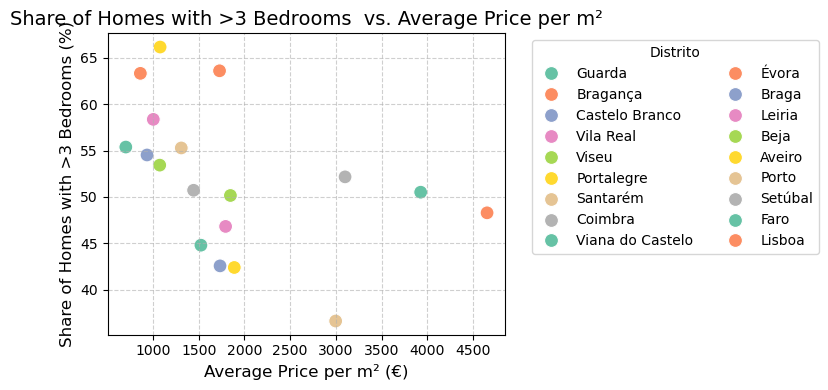

In [96]:
%matplotlib inline

# Scatter plot data
x = final_table['Average_Price_per_m2']
y = final_table['Total_Share_of_3_and_Larger_Bedrooms']

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=x, y=y, hue=final_table['Distrito'], palette='Set2', s=100)

# Add labels and title
plt.xlabel('Average Price per m² (€)', fontsize=12)
plt.ylabel('Share of Homes with >3 Bedrooms (%)', fontsize=12)
plt.title('Share of Homes with >3 Bedrooms  vs. Average Price per m²', fontsize=14)

# Add gridlines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Add legend for districts and set ncol to 2 for two columns
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Show the plot
plt.tight_layout()
plt.show()


                   Total_price  Average_price
Distrito                                     
Lisboa            3.499624e+09  476009.736942
Faro              2.302876e+09  441502.386887
Porto             2.105943e+09  331175.143262
Setúbal           8.910783e+08  314868.656184
Aveiro            3.022306e+08  233382.664865
Braga             2.488048e+08  214671.949957
Leiria            2.720515e+08  209592.808937
Beja              7.719251e+07  190129.334975
Viana do Castelo  1.247048e+08  177895.554922
Évora             7.039498e+07  172960.638821
Coimbra           1.667268e+08  156257.572634
Santarém          1.415106e+08  140526.884806
Viseu             8.402808e+07  124670.734421
Portalegre        3.749320e+07  110926.642012
Vila Real         2.845494e+07  108193.707224
Castelo Branco    5.255246e+07   85451.147967
Bragança          1.285755e+07   84589.144737
Guarda            1.338878e+07   60858.090909


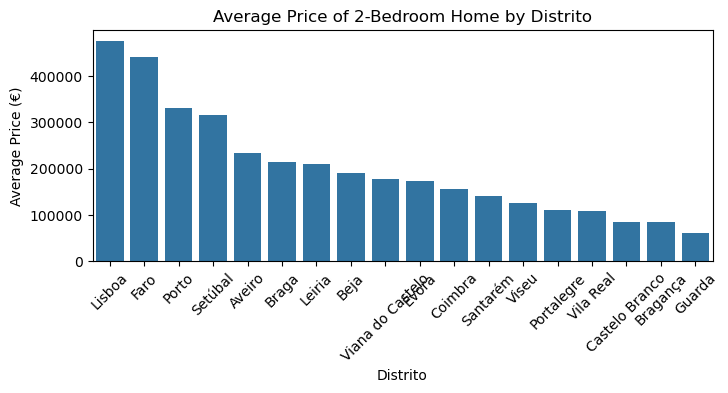

In [127]:
property_var = 2
df_rooms_property_var = df_no_duplicates[df_no_duplicates['Number_of_Rooms'] == property_var]

df_rooms_property_var_table = df_rooms_property_var.groupby('Distrito').agg(
    Total_price=('Price', 'sum'),
    Average_price=('Price', 'mean')
)

df_rooms_property_var_table = df_rooms_property_var_table.sort_values(by='Average_price', ascending=False)

print(df_rooms_property_var_table)

plt.figure(figsize=(8, 3))  # (width, height)

# Create a bar chart using Seaborn
sns.barplot(x='Distrito', y='Average_price', data=df_rooms_property_var_table)

# Add labels and title
plt.xlabel('Distrito')
plt.ylabel('Average Price (€)')
plt.title('Average Price of 2-Bedroom Home by Distrito')

plt.xticks(rotation=45)  # You can change 45 to any angle you prefer (e.g., 90, 60, etc.)

# Show the plot
plt.show()

                    Total_price  Average_price
Concelho                                      
Lagoa               121697090.0  452405.539033
Porto               737876934.0  404316.128219
Matosinhos          224845486.0  377891.573109
Vila Nova de Gaia   605982450.0  327204.346652
Vila do Conde        57784815.0  296332.384615
Póvoa de Varzim      58711970.0  290653.316832
Maia                 79320070.0  267070.942761
Gondomar             83602525.0  230309.986226
Paços de Ferreira     6601400.0  220046.666667
Valongo              43091265.0  218737.385787
Paredes              26909527.0  206996.361538
Trofa                 3738000.0  196736.842105
Lousada               9277700.0  193285.416667
Penafiel              9259387.0  171470.129630
Santo Tirso           5924600.0  164572.222222
Marco de Canaveses   12536299.0  149241.654762
Felgueiras            3921900.0  140067.857143
Amarante              9230468.0  137768.179104
Baião                 5630850.0   82806.617647


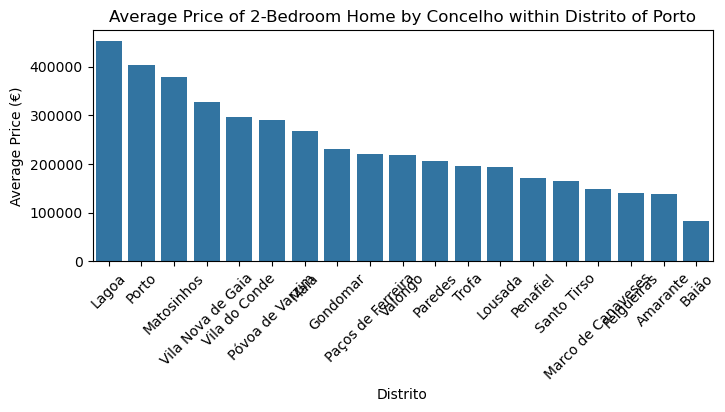

In [130]:
distrito_var = "Porto"
df_rooms_property_distrito_var = df_rooms_property_var[df_rooms_property_var['Distrito'] == distrito_var]

df_rooms_property_distrito_var_table = df_rooms_property_distrito_var.groupby('Concelho').agg(
    Total_price=('Price', 'sum'),
    Average_price=('Price', 'mean')
)

df_rooms_property_distrito_var_table = df_rooms_property_distrito_var_table.sort_values(by='Average_price', ascending=False)

print(df_rooms_property_distrito_var_table)

plt.figure(figsize=(8, 3))  # (width, height)

# Create a bar chart using Seaborn
sns.barplot(x='Concelho', y='Average_price', data=df_rooms_property_distrito_var_table)

# Add labels and title
plt.xlabel('Distrito')
plt.ylabel('Average Price (€)')
plt.title(f'Average Price of 2-Bedroom Home by Concelho within Distrito of {distrito_var}')

plt.xticks(rotation=45)  # You can change 45 to any angle you prefer (e.g., 90, 60, etc.)

# Show the plot
plt.show()


#### 2.8 Linear Regression

In [50]:
df_no_duplicates.head(1)

Title     Price Type               Area                  Floor                                               URL                                         Unique Key Tipo Construção Location_1 Location_2 Location_3 Location_4  Concelho Distrito Title_Property_Type Property_Type  Number_of_Rooms  Listing_Area  Average_Price_per_m2  Floor_Number Elevator_Status  Price_per_m2
0  Apartamento T2 na rua da Liberdade, 19, Carreg...  199000.0   T2  117 m² área bruta  3º andar com elevador  https://www.idealista.pt/comprar-casas/alenquer/  Apartamento T2 na rua da Liberdade, 19, Carreg...               .   alenquer                   NaN        NaN  Alenquer   Lisboa                  T2     apartment                2         117.0           1700.854701             0    com elevador   1700.854701

In [51]:
df_no_duplicates.to_csv('regression_test.csv', index=False, encoding='utf-8-sig', sep=',', quoting=1)  # quoting=1 uses minimal quoting

In [52]:
### Using Location_2 instead of Concelho or Distrito
### There populated entries on Location_2 are only ~64k. I filled the remaining 40k or so with Location_1, as I have no more data to fill it with

df_no_duplicates['Location_2'] = df_no_duplicates['Location_2'].fillna(df_no_duplicates['Location_1'])

# Check for missing Location_2
blank_types = df_no_duplicates[(df_no_duplicates['Location_2'].isnull())]
print(blank_types)

df_regression = df_no_duplicates

df_regression = df_regression[df_regression['Concelho'] == 'Cascais']

df_regression = df_regression.drop(columns=['Title', 'Area', 'Area', 'Floor', 'URL', 'Location_1', 'Location_3', 'Location_4', 'Concelho', 'Distrito', 'Title_Property_Type'])

Empty DataFrame
Columns: [Title, Price, Type, Area, Floor, URL, Unique Key, Tipo Construção, Location_1, Location_2, Location_3, Location_4, Concelho, Distrito, Title_Property_Type, Property_Type, Number_of_Rooms, Listing_Area, Average_Price_per_m2, Floor_Number, Elevator_Status, Price_per_m2]
Index: []


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
import matplotlib.ticker as mticker

# Step 1: Perform One-Hot Encoding on the 'Gas Type' column
regression_model = pd.get_dummies(df_regression, columns=['Property_Type', "Elevator_Status", 'Location_2'], drop_first=True)  # drop_first=True avoids multicollinearity

# Step 2: Define the dependent variables (features) and independent variable (target)
X = regression_model[['Listing_Area', 'Number_of_Rooms', 'Floor_Number'] + [col for col in regression_model.columns if ("Property_Type" in col or "Elevator_Status" in col or "Location_2" in col)]]
y = regression_model['Price']

# Step 3: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict the test set results
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Optional: Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

formatter = mticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(",", " "))
plt.gca().xaxis.set_major_formatter(formatter)  # Format x-axis
plt.gca().yaxis.set_major_formatter(formatter)  # Format y-axis

plt.grid(True)
plt.show()

Model Coefficients: [ 5.83089290e+00  2.88457681e+05 -6.76160096e+03 -1.79651696e+06
  1.90097419e+06 -1.11395256e+06 -2.00026881e+06 -3.49934416e+05
 -2.09214220e+04  7.39852613e+05  5.60833980e+05 -5.23989633e+05]
Intercept: 1914241.6324068937
R-squared: 0.29833859328916257
Mean Squared Error: 1325629815958.0698


<IPython.core.display.Javascript object>

In [54]:
# Print all coefficients with their corresponding feature names
coefficients = model.coef_
features = X_train.columns

print("\nModel Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")


Model Coefficients:
Listing_Area: 5.830892902854864
Number_of_Rooms: 288457.68069949676
Floor_Number: -6761.600960733654
Property_Type_apartment: -1796516.958224298
Property_Type_farm: 1900974.1937934917
Property_Type_house: -1113952.560822114
Property_Type_other: -2000268.8125840398
Elevator_Status_sem elevador: -349934.4159725853
Location_2_carcavelos-e-parede: -20921.42200078185
Location_2_cascais: 739852.612849464
Location_2_estoril: 560833.9798335901
Location_2_sao-domingos-de-rana: -523989.63330616715
